<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [40]:
# Import necessary libraries
import torch


In [41]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [42]:
# Create the data parameters
w = 0.3
b = 0.9

# Make X and y using linear regression feature
X = torch.arange(0,1,0.01).unsqueeze(dim=1)
y = w*X +b

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [43]:
# Split the data into training and testing
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

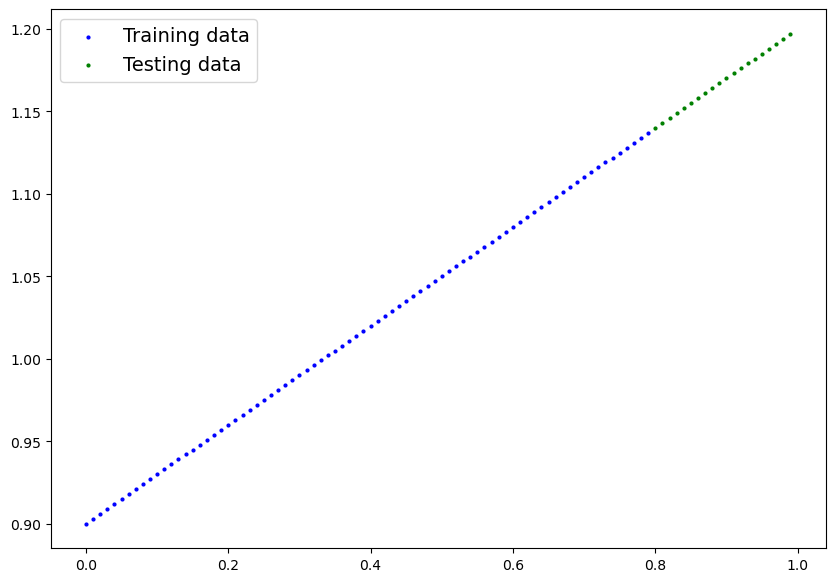

In [44]:
import matplotlib.pyplot as plt
# Plot the training and testing data 
def plot_predictions(trainX = X_train,
                        testX = X_test,
                        trainy= y_train,
                        testy = y_test,
                        predictions = None):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(trainX, trainy, c="b", s=4, label="Training data")
  
  # Plot test data in green
    plt.scatter(testX, testy, c="g", s=4, label="Testing data")

    if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(testX, predictions, c="r", s=4, label="Predictions")

  # Show the legend
    plt.legend(prop={"size": 14});
plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [45]:
import torch.nn as nn
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionn(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype = torch.float32))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [46]:
# Instantiate the model and put it to the target device
model = LinearRegressionn().to(device)
model, next(model.parameters()).device, model.state_dict()

(LinearRegressionn(),
 device(type='cuda', index=0),
 OrderedDict([('weights', tensor([0.3238], device='cuda:0')),
              ('bias', tensor([-0.6020], device='cuda:0'))]))

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [47]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

In [48]:
# Training loop
Epochs = 300

# Train model for 300 epochs

model.train()

# Send data to target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(Epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        model.eval()
        with torch.inference_mode():
            ypd = model(X_test)
            test_loss = loss_fn(ypd, y_test)
            print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")
 ### Training

  # Put model in train mode
  # 1. Forward pass
  # 2. Calculate loss
  # 3. Zero gradients
  # 4. Backpropagation
  # 5. Step the optimizer
  

  ### Perform testing every 20 epochs
    # Put model in evaluation mode and setup inference context 
    
      # 1. Forward pass
      
      # 2. Calculate test loss

      # Print out what's happening
#       print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 1.493 | Test loss: 1.467
Epoch: 20 | Train loss: 1.261 | Test loss: 1.196
Epoch: 40 | Train loss: 1.030 | Test loss: 0.926
Epoch: 60 | Train loss: 0.799 | Test loss: 0.655
Epoch: 80 | Train loss: 0.568 | Test loss: 0.384
Epoch: 100 | Train loss: 0.337 | Test loss: 0.114
Epoch: 120 | Train loss: 0.136 | Test loss: 0.129
Epoch: 140 | Train loss: 0.102 | Test loss: 0.200
Epoch: 160 | Train loss: 0.093 | Test loss: 0.208
Epoch: 180 | Train loss: 0.086 | Test loss: 0.198
Epoch: 200 | Train loss: 0.079 | Test loss: 0.183
Epoch: 220 | Train loss: 0.073 | Test loss: 0.168
Epoch: 240 | Train loss: 0.066 | Test loss: 0.153
Epoch: 260 | Train loss: 0.059 | Test loss: 0.137
Epoch: 280 | Train loss: 0.052 | Test loss: 0.122


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [49]:
# Make predictions with the model
model.eval()
with torch.inference_mode():
    y_pre = model(X_test)

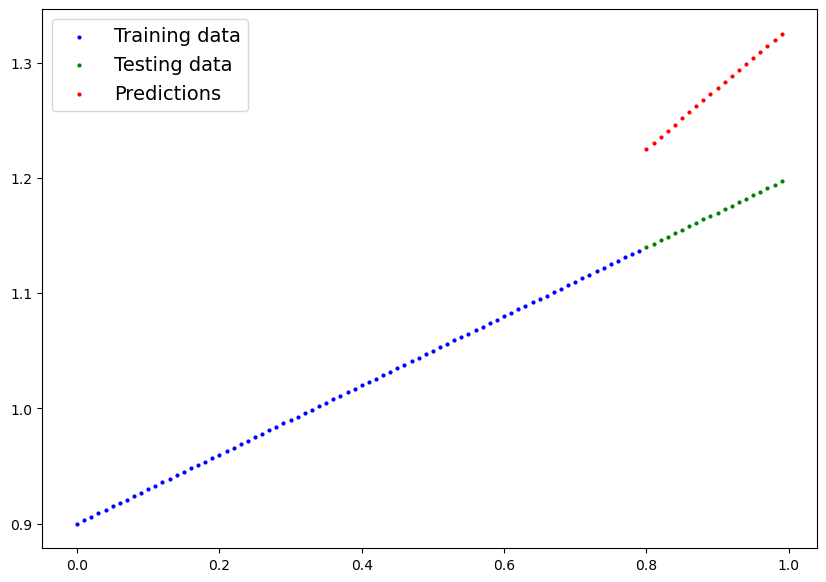

In [50]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_pre.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [52]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")

# 2. Create model save path 
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# 3. Save the model state dict
 # create model save path
MODEL_NAME = "exercise.pth"
MODEL_SAVE_PATH =  MODEL_PATH/MODEL_NAME
    
    #save the mdoel state dict
    
print(f"SAving Model to: {MODEL_SAVE_PATH}")
    
torch.save(obj=model.state_dict(), f= MODEL_SAVE_PATH)

SAving Model to: models/exercise.pth


In [55]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
load_model = LinearRegressionn()
load_model.load_state_dict(torch.load(f="models/exercise.pth"))
load_model, load_model.state_dict()
load_model = load_model.to(device)

In [57]:
# Make predictions with loaded model and compare them to the previous
laod_pred = load_model(X_test)
# load_pred == y_pre

In [59]:
laod_pred== y_pre

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')